# Contents List

## 01. Importing Libraries
## 02. Importing Data
## 03. Creating a Path
## 04. Exploring Relationships
+ Correlations
+ Scatterplots
+ Pair Plots
+ Categorical Plots
+ Catplot Plots
## 05. Exporting Data
## 06. Workflow
## 07. Questions and Hypotheses

# 01. Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm     #for color palettes
import seaborn as sns
import scipy

# 2. Paths

In [5]:
#Create a path
path = r'/Users/aya/Desktop/DataAnalytics/Data-Immersion/Achievement-6/UCS-Satellite-Analysis'

In [6]:
path

'/Users/aya/Desktop/DataAnalytics/Data-Immersion/Achievement-6/UCS-Satellite-Analysis'

# 03. Importing Data

In [8]:
#Import the cleaned Dataset
df_cleaned = pd.read_csv(os.path.join(path, '02-Data', 'Prepared-Data', 'Satellite_clean.csv'), index_col=0)


In [9]:
#Check the dataframe
df_cleaned.head(5)

,ID Number COSPAR,Satellite Name,Country of Operator/Owner,Operator/Owner,Country of Contractor,Contractor,Users,Purpose,Detailed Purpose,Class of Orbit,Type of Orbit,Period (minutes),Expected Lifetime (yrs.),Launch Mass (kg.),Dry Mass (kg.),Power (watts),Launch Site,Launch Vehicle,Launch Year,Launch Month
0,2019-089H,1HOPSAT-TD (1st-generation High Optical Perfor...,USA,Hera Systems,USA,Hera Systems,Commercial,Earth Observation,Infrared Imaging,LEO,Non-Polar Inclined,96.08,0.5,22.0,NaN,NaN,Satish Dhawan Space Centre,PSLV,2019,12
1,2023-001DC,AAC AIS-Sat1 (Kelpie 1),UK,AAC Clyde Space,Multinational,AAC Clyde Space,Commercial,Earth Observation,Automatic Identification System (AIS),LEO,Sun-Synchronous,95.00,4.0,4.0,4,NaN,Cape Canaveral,Falcon 9,2023,1
2,2017-036L,Aalto-1,Finland,Aalto University,Finland,Aalto University,Civil,Technology Development,NaN,LEO,Sun-Synchronous,94.70,2.0,4.5,NaN,4.5,Satish Dhawan Space Centre,PSLV,2017,6
3,2016-025E,AAt-4,Denmark,University of Aalborg,Denmark,University of Aalborg,Civil,Earth Observation,Automatic Identification System (AIS),LEO,Sun-Synchronous,95.90,4.0,1.0,NaN,NaN,Guiana Space Center,Soyuz-2.1a,2016,4
4,2014-006A,"ABS-2 (Koreasat-8, ST-3)",Multinational,Asia Broadcast Satellite Ltd.,USA,Space Systems/Loral,Commercial,Communications,NaN,GEO,NaN,1436.03,15.0,6330.0,NaN,16000,Guiana Space Center,Ariane 5 ECA,2014,2


In [10]:
#Check the Dimension
df_cleaned.shape

(7551, 20)

# 4. Exploring Relationships

In [12]:
#Check the datatype
df_cleaned.dtypes

ID Number COSPAR              object
Satellite Name                object
Country of Operator/Owner     object
Operator/Owner                object
Country of Contractor         object
Contractor                    object
Users                         object
Purpose                       object
Detailed Purpose              object
Class of Orbit                object
Type of Orbit                 object
Period (minutes)             float64
Expected Lifetime (yrs.)     float64
Launch Mass (kg.)            float64
Dry Mass (kg.)                object
Power (watts)                 object
Launch Site                   object
Launch Vehicle                object
Launch Year                    int64
Launch Month                   int64
dtype: object

In [13]:
#Check the Stats
df_cleaned.describe()

,Period (minutes),Expected Lifetime (yrs.),Launch Mass (kg.),Launch Year,Launch Month
count,7551.000000,7551.000000,7551.000000,7551.000000,7551.000000
mean,224.112830,5.111475,636.071308,2019.456893,5.952721
std,441.326798,3.107859,1386.523750,4.682838,3.570670
min,9.000000,0.250000,0.500000,1974.000000,1.000000
25%,95.000000,4.000000,148.000000,2019.000000,3.000000
50%,95.600000,4.000000,260.000000,2021.000000,5.000000
75%,96.600000,4.000000,290.000000,2022.000000,9.000000
max,11520.000000,30.000000,22500.000000,2023.000000,12.000000


In [14]:
#Create a dataframe for only the quantatitve vairables [Launch Mass, Expected Lifetime,Satellite Period]
df_numeric_variables = df_cleaned[['Launch Mass (kg.)', 'Expected Lifetime (yrs.)', 'Period (minutes)']]

In [15]:
#Check the dataframe
df_numeric_variables.head(5)

,Launch Mass (kg.),Expected Lifetime (yrs.),Period (minutes)
0,22.0,0.5,96.08
1,4.0,4.0,95.00
2,4.5,2.0,94.70
3,1.0,4.0,95.90
4,6330.0,15.0,1436.03


In [16]:
#Check the dimensions 
df_numeric_variables.shape

(7551, 3)

In [17]:
#Create a correlation matrix using pandas
df_numeric_variables.corr()

,Launch Mass (kg.),Expected Lifetime (yrs.),Period (minutes)
Launch Mass (kg.),1.000000,0.685704,0.628617
Expected Lifetime (yrs.),0.685704,1.000000,0.705232
Period (minutes),0.628617,0.705232,1.000000


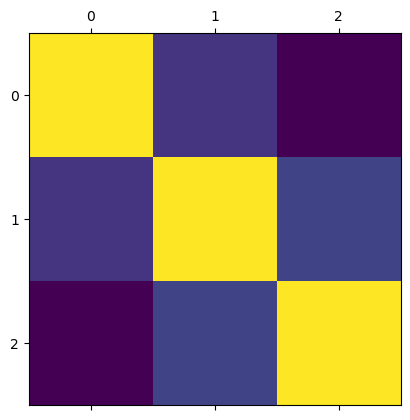

In [18]:
# Create a correlation heatmap using matplotlib
plt.matshow(df_numeric_variables.corr())
plt.show()

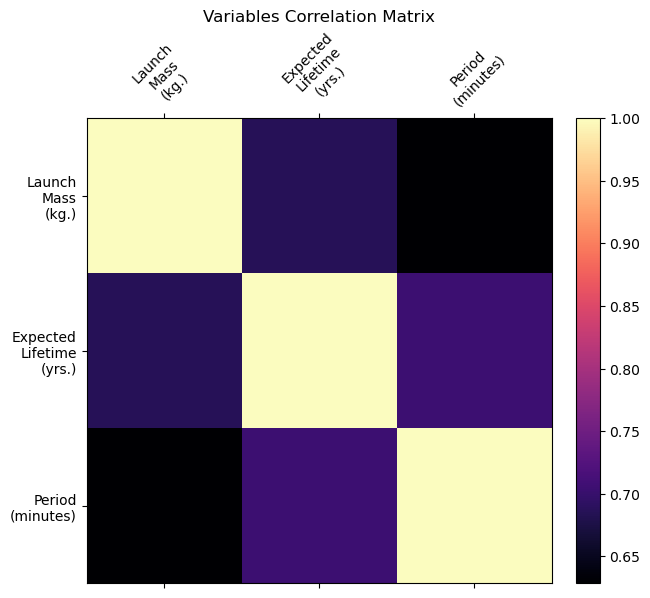

In [19]:
#Create a correlation heatmap using --matplotlib
plt.figure(figsize=(8, 6))
plt.matshow(df_numeric_variables.corr(), fignum=1, cmap='magma') #type of plot vmin=-1, vmax=1)  # Set the colorbar range
plt.xticks(range(df_numeric_variables.shape[1]), 
           [name.replace(' ', '\n') for name in df_numeric_variables.columns], fontsize=10, rotation=45)
plt.yticks(range(df_numeric_variables.shape[1]), 
           [name.replace(' ', '\n') for name in df_numeric_variables.columns], fontsize=10)
plt.colorbar(cmap='magma', fraction=0.046, pad=0.04) #Size, distance
plt.tick_params(labelsize=10)
plt.title('Variables Correlation Matrix', fontsize=12)
plt.show()

#plt.matshow(df_numeric_variables.corr(), fignum=1, cmap='cividis', vmin=-1, vmax=1)  # Set the colorbar range
### List of Some Common Matplotlib Colormaps:
### **Sequential**: `'viridis'`, `'plasma'`, `'inferno'`, `'magma'`, `'cividis'`
### **Diverging**: `'coolwarm'`, `'RdYlBu'`, `'Spectral'`, `'BrBG'`
### **Qualitative**: `'Set1'`, `'Set2'`, `'Paired'`, `'tab10'

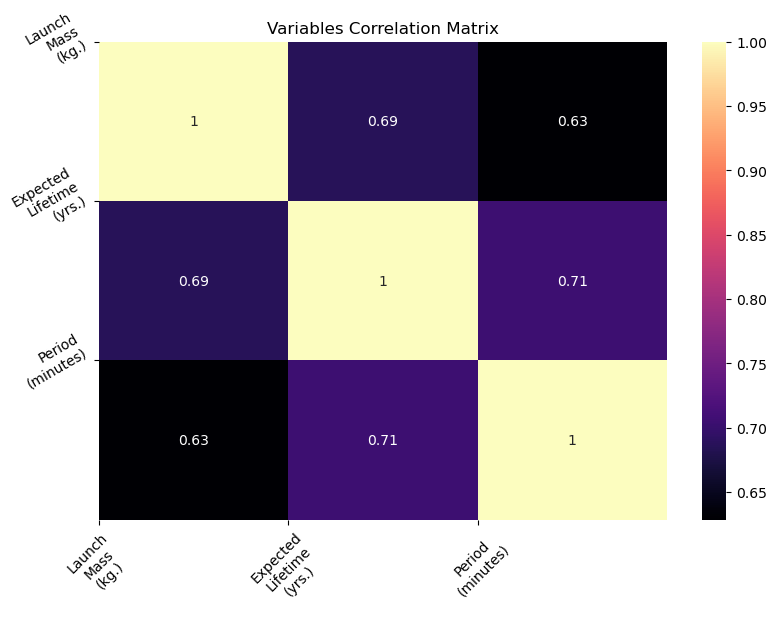

In [20]:
#Create a correlation heatmap using seaborn
plt.figure(figsize=(8, 6))           
sns.heatmap(df_numeric_variables.corr(), annot = True, cmap='magma') # The `annot` argument allows the plot to place the correlation coefficients onto the heatmap.
# Add titles and labels
plt.xticks(range(df_numeric_variables.shape[1]), [name.replace(' ', '\n') for name in df_numeric_variables.columns], fontsize=10, rotation=45) # x axis labels
plt.yticks(range(df_numeric_variables.shape[1]), [name.replace(' ', '\n') for name in df_numeric_variables.columns],
           fontsize=10, rotation=30) # y axis labels
plt.tight_layout(pad=0.04)
plt.tick_params(labelsize=10)
plt.title('Variables Correlation Matrix', fontsize=12)
plt.show()

# Observations (Correlation-Heatmap)

## The color of the heatmap indicates the strength of the correlation between the variables.

## The diagonal line, where there is a perfect positive relationship indicated by the value of 1, represents each variable correlated with itself. Therefore, this will be excluded from the analysis.

## The color scale values range from 1 to 0.65, with values closer to positive 1, shown in light yellow, representing strong positive correlations. As the values decrease, they approach dark blue, which represents weaker. Values close to 0 indicate no relationship, and values closer to -1 indicate negative correlations.

## The variables show values ranging from 1 to 0.65, indicates a strong positive correlation between the variables at hand. This suggests that as one variable increases, the others tend to increase as well. 

## Launch Mass with Expected Lifetime shows (0.69) coefficient indicates a strong positive correlation. This suggests that as Launch Mass increases, Expected Lifetime tends to increase as well, and vice versa.

## Launch Mass with Period  shows (0.63) coefficient indicates a strong positive correlation. This suggests that as Launch Mass increases, the period for the satellite to orbit around the Earth, based on its class of orbit, increases, and vice versa.


## Expected Lifetime with Period shows (0.71) coefficient indicates a strong positive correlation. This suggests that as Expected Lifetime increases, the period for the satellite to orbit around the Earth, based on its class of orbit, also tends to increase, and vice versa.


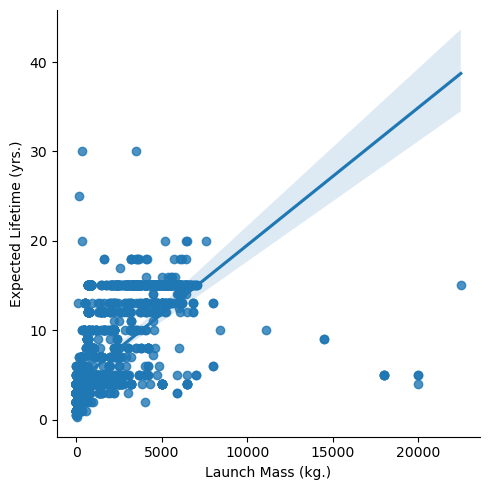

In [23]:
#Create a scatterplot for the --Launch Mass (Kg.) and --Expected Lifetime (yrs.) columns in seaborn
sns.lmplot(x = 'Launch Mass (kg.)', y = 'Expected Lifetime (yrs.)', data = df_cleaned)
plt.show()

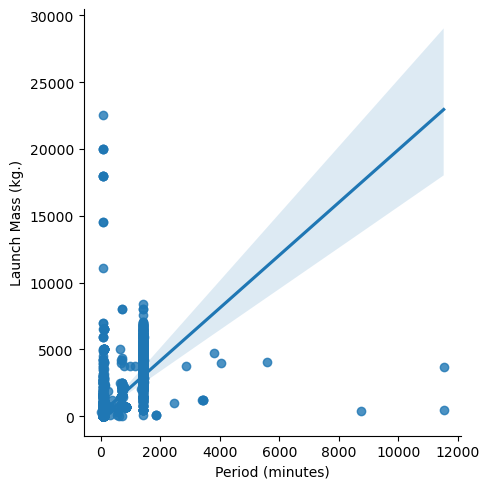

In [24]:
#Create a scatterplot for the --Period (minutes) and --Launch Mass (Kg.) columns in seaborn
sns.lmplot(x = 'Period (minutes)', y = 'Launch Mass (kg.)', data = df_cleaned)
plt.show()

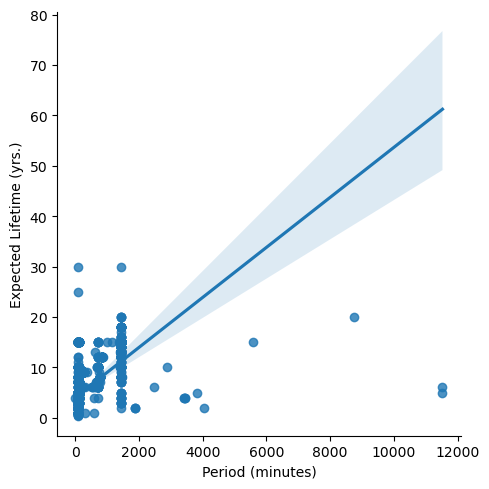

In [25]:
#Create a scatterplot for the --Period (minutes) and --Expected Lifetime (yrs.) columns in seaborn
sns.lmplot(x = 'Period (minutes)', y = 'Expected Lifetime (yrs.)', data = df_cleaned)
plt.show()

# Observations (Correlation-Scatterplot)

## The correlation between the Launch Mass (Kg) and Expected Lifetime (yrs) columns: (coefficient of 0.69)
## The correlation between the Launch Mass (Kg) and Period (minutes) columns: (coefficient of 0.63)
## The correlation between the Period (minutes) and --Expected Lifetime (yrs.) columns: (coefficient of 0.71

## The three scatterplots suggesta that outlier values may have influenced this correlation, resulting in a correlation coefficient of 0.63. Furthermore, there is some structure in the data points that could be driven by quantitative variables, such as the Class of Orbit. Exploring these correlations based on Class of Orbit might provide a better understanding of the relationship between Launch Mass and Expected Lifetime, if any. 

## The relationship between the variables may be non-linear. This implies that the correlation observed might not fully capture the complexity of their interaction.

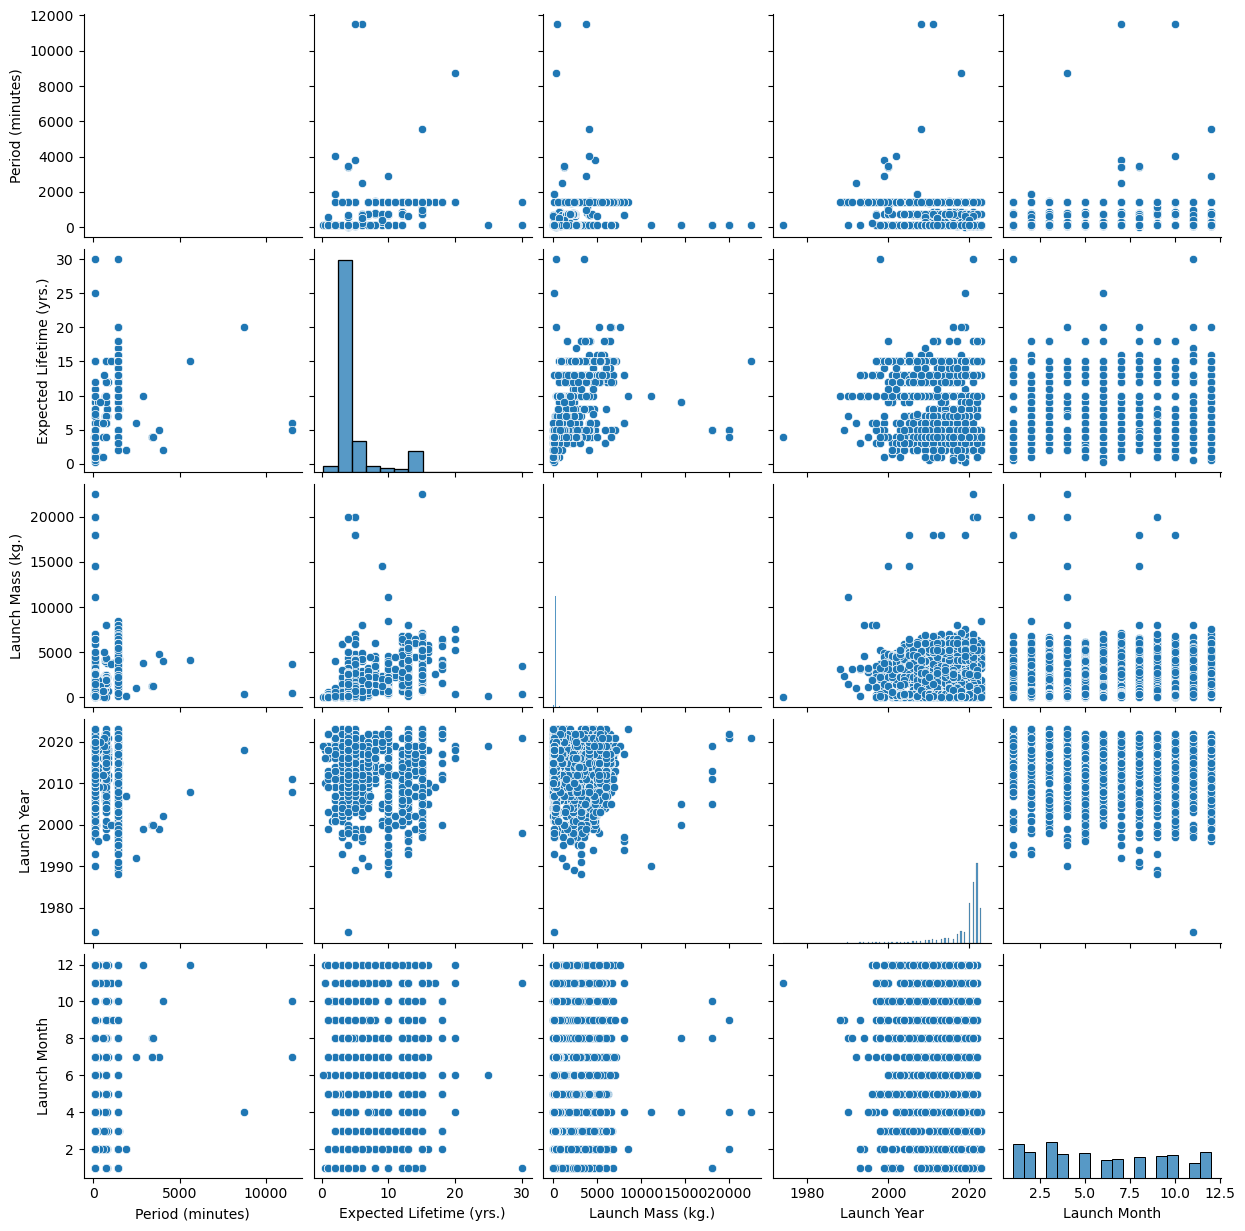

In [28]:
#Create a pair plot for the variables of interest in the dataset.
pair_plots = sns.pairplot(df_cleaned)

In [29]:
pair_plots

# Observations (Pair Plots)

## Period (minutes) and Expected Lifetime (yrs) do not appear to have a linear relationship.

## Period (minutes) and Launch Mass (Kg) also do not appear to have a linear relationship. The pair plot indicates that the period it takes for satellites to orbit the Earth is more likely to be fixed depending on the class of orbit in which the satellites rotate.

## Expected Lifetime (yrs) and Launch Mass (Kg) seem to exhibit some linear relationship. However, the data points appear more structured.

## The Launch Year reveals that there have been more satellite launches in recent years compared to earlier years.

## The Launch Month shows that satellites are launched throughout the months of the year.

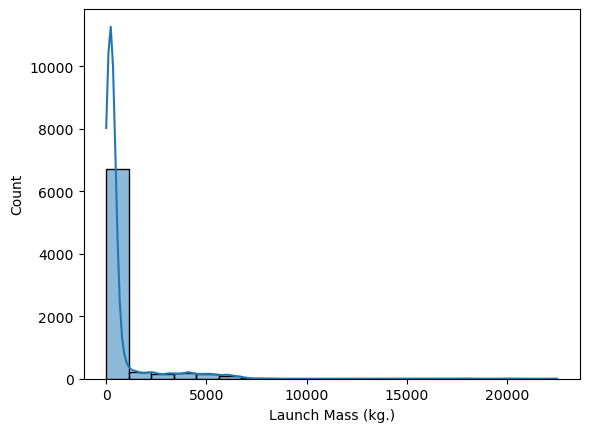

In [32]:
#Create a categorical plot for --Launch Mass (Kg)  
hist_Launch_Mass = sns.histplot(df_cleaned['Launch Mass (kg.)'], bins = 20, kde = True)

#Argument "kde" add a line that encompasses the distribution.

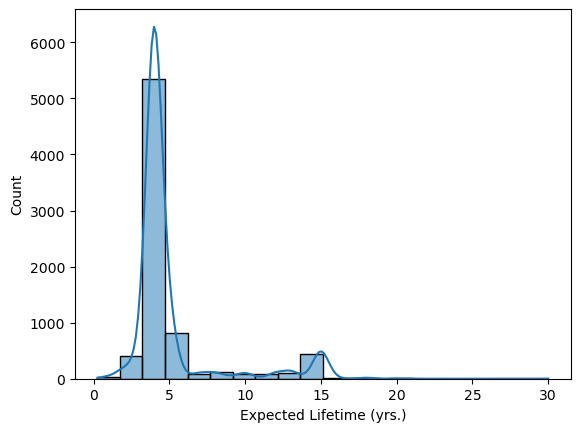

In [33]:
#Create a categorical plot for --Expected Lifetime (yrs)
hist_Expected_Lifetime = sns.histplot(df_cleaned['Expected Lifetime (yrs.)'], bins = 20, kde = True)

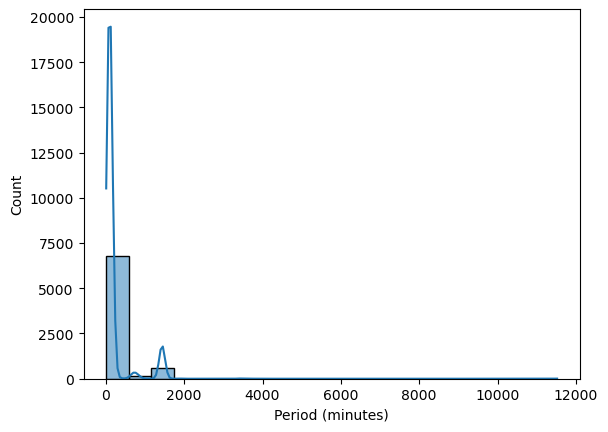

In [34]:
#Create a categorical plot for --Period (minutes)
hist_Period = sns.histplot(df_cleaned['Period (minutes)'], bins = 20, kde = True)

# Observations (Categorical Plots)

## Visualize the distribution of the variables:

## Launch Mass (Kg)
+ Most of the satellites, more than 7,000, in the data have a Launch Mass (Kg) of less than 1,000. 
+ Fewer than 1000 satellites have a Launch Mass (Kg) greater than 1000. 
+ The data is skewed to the right, as the mean is greater than the median.
### I can create categories based on the given data in the histogram for satellites with Launch Mass (Kg):
+ Light Weight Satellites: ≤ 1000 Kg
+ Medium Weight Satellites: > 1000 Kg & < 5000 Kg
+ Heavy Weight Satellites: ≥ 5000 Kg


## Expected Lifetime (yrs): 
+ Most of the satellites, more than 5000, in the data have an Expected Lifetime( yrs) between 3-4 years. 
+ Fewer than 1000 satellites have have an Expected Lifetime( yrs) less than 3 years and. More than 4 years. 
+ The data is skewed to the right, as the mean is greater than the median.
### I can create categories based on the given data in the histogram for satellites with Expected Lifetime( yrs):
+ Short Expected Lifetime: < 3 yrs
+ Medium Expected Lifetime: >= 3 yrs & <= 4 yrs
+ Heavy Expected Lifetime: > 4 yrs


## Period (minutes):
+ Most of the satellites, more than 6,000, in the data have a Period (minutes) of less than 1,000 minutes. 
+ Fewer than 1000 satellites have a Period (minutes) greater than 1,000 minutes. 
+ The data is skewed to the right, as the mean is greater than the median.
### I can create categories based on the given data in the histogram for satellites with Period (minutes):
+ Slow Rotation Period: > 1000 minutes
+ Fast Rotation Period: ≤ 1000 minutes

In [37]:
#Create a Categories for --Launch Mass (kg.)
df_cleaned.loc[df_cleaned['Launch Mass (kg.)'] <= 1000, 'Launch Mass Categories'] = 'Light Weight Satellites'

In [38]:
#Create a Categories for --Launch Mass (kg.)
df_cleaned.loc[(df_cleaned['Launch Mass (kg.)'] > 1000) & (df_cleaned['Launch Mass (kg.)'] < 5000), 'Launch Mass Categories'] = 'Medium Weight Satellites'


In [39]:
#Create a Categories for --Launch Mass (kg.)
df_cleaned.loc[df_cleaned['Launch Mass (kg.)'] >= 5000, 'Launch Mass Categories'] = 'Heavy Weight Satellites'


In [40]:
#Check the frequency of the Launch Mass (kg.) Categories
df_cleaned['Launch Mass Categories'].value_counts(dropna = False)

Launch Mass Categories
Light Weight Satellites     6701
Medium Weight Satellites     622
Heavy Weight Satellites      228
Name: count, dtype: int64

In [41]:
#Check the columns  
df_cleaned.columns

Index(['ID Number COSPAR', 'Satellite Name', 'Country of Operator/Owner',
       'Operator/Owner', 'Country of Contractor', 'Contractor', 'Users',
       'Purpose', 'Detailed Purpose', 'Class of Orbit', 'Type of Orbit',
       'Period (minutes)', 'Expected Lifetime (yrs.)', 'Launch Mass (kg.)',
       'Dry Mass (kg.)', 'Power (watts)', 'Launch Site', 'Launch Vehicle',
       'Launch Year', 'Launch Month', 'Launch Mass Categories'],
      dtype='object')

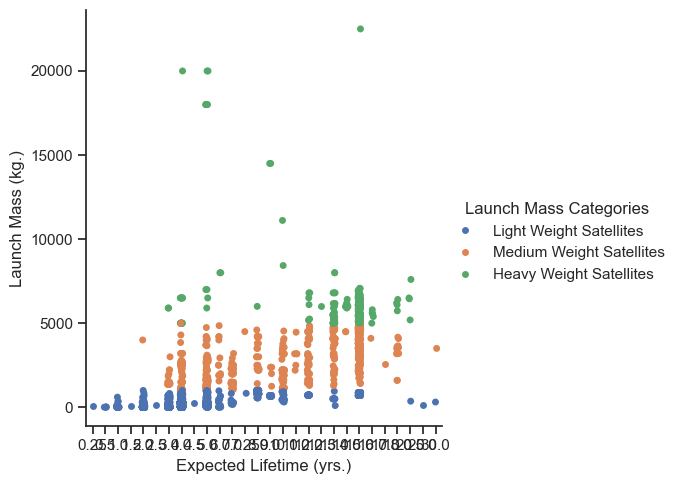

In [42]:
#Create a catplot in seaborn for the --Launch Mass (kg.) 
sns.set(style="ticks")
sns.catplot(x= 'Expected Lifetime (yrs.)', y= 'Launch Mass (kg.)', hue = "Launch Mass Categories", data=df_cleaned)

In [43]:
#Create a Categories for --Expected Lifetime (yrs.)
df_cleaned.loc[df_cleaned['Expected Lifetime (yrs.)'] < 3, 'Expected Lifetime Categories'] = 'Short Expected Lifetime'

In [44]:
#Create a Categories for --Expected Lifetime (yrs.)
df_cleaned.loc[(df_cleaned['Expected Lifetime (yrs.)'] >= 3) & (df_cleaned['Expected Lifetime (yrs.)'] <= 4), 'Expected Lifetime Categories'] = 'Medium Expected Lifetime'


In [45]:
#Create a Categories for --Expected Lifetime (yrs.)
df_cleaned.loc[df_cleaned['Expected Lifetime (yrs.)'] > 4, 'Expected Lifetime Categories'] = 'Long Expected Lifetime'

In [46]:
#Check the frequency of the Expected Lifetime  Categories
df_cleaned['Expected Lifetime Categories'].value_counts(dropna = False)

Expected Lifetime Categories
Medium Expected Lifetime    5621
Long Expected Lifetime      1764
Short Expected Lifetime      166
Name: count, dtype: int64

In [47]:
#Check the columns  
df_cleaned.columns

Index(['ID Number COSPAR', 'Satellite Name', 'Country of Operator/Owner',
       'Operator/Owner', 'Country of Contractor', 'Contractor', 'Users',
       'Purpose', 'Detailed Purpose', 'Class of Orbit', 'Type of Orbit',
       'Period (minutes)', 'Expected Lifetime (yrs.)', 'Launch Mass (kg.)',
       'Dry Mass (kg.)', 'Power (watts)', 'Launch Site', 'Launch Vehicle',
       'Launch Year', 'Launch Month', 'Launch Mass Categories',
       'Expected Lifetime Categories'],
      dtype='object')

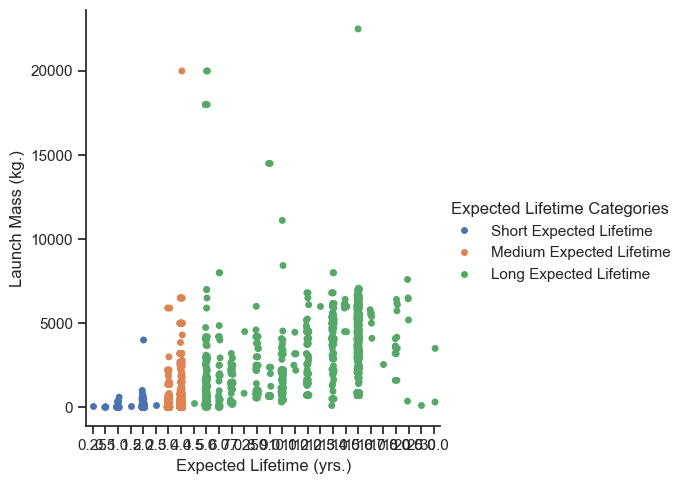

In [48]:
#Create a catplot in seaborn for the --Launch Mass (kg.) 
sns.set(style="ticks")
sns.catplot(x= 'Expected Lifetime (yrs.)', y= 'Launch Mass (kg.)', hue = "Expected Lifetime Categories", data=df_cleaned)

In [49]:
#Create a Categories for --Period (minutes)
df_cleaned.loc[df_cleaned['Period (minutes)'] > 1000, 'Period Categories'] = 'Slow Rotation Period'


In [50]:
#Create a Categories for -- Period (minutes)
df_cleaned.loc[df_cleaned['Period (minutes)'] <= 1000, 'Period Categories'] = 'Fast Rotation Period'


In [51]:
#Check the frequency of the Period Categories
df_cleaned['Period Categories'].value_counts(dropna = False)

Period Categories
Fast Rotation Period    6941
Slow Rotation Period     610
Name: count, dtype: int64

In [52]:
##Check the columns  
df_cleaned.columns

Index(['ID Number COSPAR', 'Satellite Name', 'Country of Operator/Owner',
       'Operator/Owner', 'Country of Contractor', 'Contractor', 'Users',
       'Purpose', 'Detailed Purpose', 'Class of Orbit', 'Type of Orbit',
       'Period (minutes)', 'Expected Lifetime (yrs.)', 'Launch Mass (kg.)',
       'Dry Mass (kg.)', 'Power (watts)', 'Launch Site', 'Launch Vehicle',
       'Launch Year', 'Launch Month', 'Launch Mass Categories',
       'Expected Lifetime Categories', 'Period Categories'],
      dtype='object')

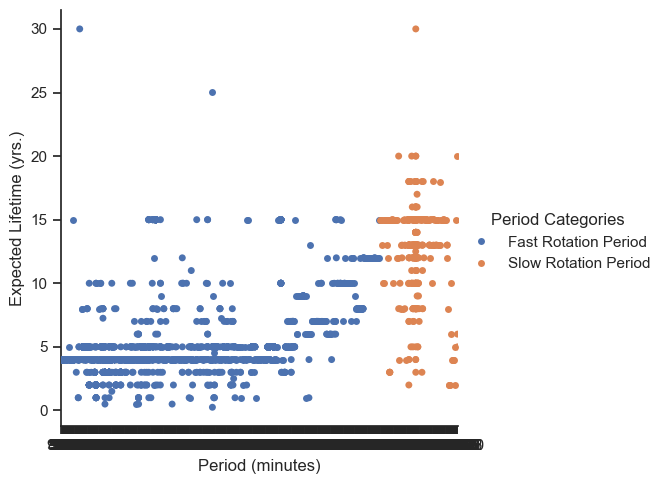

In [53]:
# Create a catplot in seaborn for the --Period Categories
sns.set(style="ticks")
sns.catplot(x= 'Period (minutes)', y= 'Expected Lifetime (yrs.)', hue = "Period Categories", data=df_cleaned)

#sns.catplot(x= 'Period (minutes)', y= 'Launch Mass (kg.)', hue = "Period Categories", data=df_cleaned)

In [54]:
##Check the dataframe  
df_cleaned.head(5)

,ID Number COSPAR,Satellite Name,Country of Operator/Owner,Operator/Owner,Country of Contractor,Contractor,Users,Purpose,Detailed Purpose,Class of Orbit,...,Launch Mass (kg.),Dry Mass (kg.),Power (watts),Launch Site,Launch Vehicle,Launch Year,Launch Month,Launch Mass Categories,Expected Lifetime Categories,Period Categories
0,2019-089H,1HOPSAT-TD (1st-generation High Optical Perfor...,USA,Hera Systems,USA,Hera Systems,Commercial,Earth Observation,Infrared Imaging,LEO,...,22.0,NaN,NaN,Satish Dhawan Space Centre,PSLV,2019,12,Light Weight Satellites,Short Expected Lifetime,Fast Rotation Period
1,2023-001DC,AAC AIS-Sat1 (Kelpie 1),UK,AAC Clyde Space,Multinational,AAC Clyde Space,Commercial,Earth Observation,Automatic Identification System (AIS),LEO,...,4.0,4,NaN,Cape Canaveral,Falcon 9,2023,1,Light Weight Satellites,Medium Expected Lifetime,Fast Rotation Period
2,2017-036L,Aalto-1,Finland,Aalto University,Finland,Aalto University,Civil,Technology Development,NaN,LEO,...,4.5,NaN,4.5,Satish Dhawan Space Centre,PSLV,2017,6,Light Weight Satellites,Short Expected Lifetime,Fast Rotation Period
3,2016-025E,AAt-4,Denmark,University of Aalborg,Denmark,University of Aalborg,Civil,Earth Observation,Automatic Identification System (AIS),LEO,...,1.0,NaN,NaN,Guiana Space Center,Soyuz-2.1a,2016,4,Light Weight Satellites,Medium Expected Lifetime,Fast Rotation Period
4,2014-006A,"ABS-2 (Koreasat-8, ST-3)",Multinational,Asia Broadcast Satellite Ltd.,USA,Space Systems/Loral,Commercial,Communications,NaN,GEO,...,6330.0,NaN,16000,Guiana Space Center,Ariane 5 ECA,2014,2,Heavy Weight Satellites,Long Expected Lifetime,Slow Rotation Period


In [55]:
##Check the dataframe  
df_cleaned.shape

(7551, 23)

# Observations (Catplots)

## Based on the proposed categories: Launch Mass Categories, Expected Lifetime Categories, and Period Categories. I can see that the data are more defined and exhibit a clearer structure. 
## All the plots show that the data follow a particular trend based on underlying factors. Based on some readings, the Class of Orbit plays a major role in a satellite's Launch Mass, Expected Lifetime, and the period they take to orbit the Earth. 
## Therefore, it is important to categorize the entire dataset based on Class of Orbit, and then proceed with exploring the variables of interest: Launch Mass, Expected Lifetime, and Period.

## 05. Exporting Data

In [59]:
#Exporting the cleaned -df_cleaned to Prepared-Data
df_cleaned.to_csv(os.path.join(path, '02-Data','Prepared-Data', 'Satellite_cleaned_Ready.csv'))

# 06. Workflow

## The  dataframe containing 7551 rows and 20 columns.

### List of variables for exploratory visual analysis
+ Launch Mass
+ Expected Lifetime
+ Satellite Period
+ Users (to split the dataset)
+  Class of Orbit (to split the dataset)
  
### I created a dataframe consisting of only the quantitative variables of interest based on the proposed questions. 

## The dataframe containing 7551 rows and 3 columns.

### I created a correlation matrix from the quantitative variables.
### Ttransformed this subsetted dataframe into a correlation matrix.
### I created a heatmap to visually represent the correlation matrix, which helps in identifying the strength and direction of relationships between the variables. 
### I created a scatterplot to visually represent the correlation between the variables, which helps in identifying whether the relationships between the variables are linear or non-linear. 

### I created a pair plot for the entire dataset.

### I created categorical plots to visualize the distribution of the variables. I proposed creating some categories based on the visualizations.

### I created a catplot to visualize the variables based on the categories I proposed above.

### I created three columns based on the proposed categories for the variables:Launch Mass (Kg),Expected Lifetime (yrs),and Period (minutes).

### The categories are: Period Categories, Launch Mass Categories, and Expected Lifetime Categories.

## The dataframe containing 7551 rows and 23 columns.

# 07. Questions and Hypotheses

### Answering the proposed questions:
+ Does the Satellite Launch Mass determine the Satellite Expected Lifetime?
+ Does the Satellite Period determine the Satellite Expected Lifetime?
##### Satellite Launch Mass and Period could determine Satellite Expected Lifetime.The data suggests that the Satellite Period may not determine Satellite Expected Lifetime.

### Future Questions and Hypotheses to Investigate:
+ Is Satellite Launch Mass influenced by the Class of Orbit?
+ Are classes of orbit associated with longer or shorter expected lifetimes?
+Satellite Launch Mass associated with Satellite Period?